در این مرحله ازمایش رو طوری انجام میدهیم که هیچس ستونی حذف نشود
 6دی 

In [1]:
# وارد کردن کتابخانه‌ها
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
import random
import matplotlib.pyplot as plt


2024-12-26 15:26:44.711738: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-26 15:26:44.932244: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735214205.031075    3869 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735214205.064536    3869 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-26 15:26:45.272449: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

# بارگذاری داده‌ها

In [2]:

# بارگذاری داده‌ها
column_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
                'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
                'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
                'is_hot_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
                'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
                'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
                'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
                'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label']


In [3]:

train_data = pd.read_csv('archive/nsl-kdd/KDDTrain+.txt', header=None, names=column_names)
test_data = pd.read_csv('archive/nsl-kdd/KDDTest+.txt', header=None, names=column_names)

In [4]:
data=pd.concat([train_data, test_data], ignore_index=True)

In [5]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,tcp,ftp_data,SF,491,0,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,udp,other,SF,146,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,tcp,private,S0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,tcp,http,SF,232,8153,0,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,tcp,http,SF,199,420,0,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,tcp,smtp,SF,794,333,0,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148513,tcp,http,SF,317,938,0,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148514,tcp,http,SF,54540,8314,0,0,0,2,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15
148515,udp,domain_u,SF,42,42,0,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


# جداسازی ویژگی‌ها و برچسب‌ها

In [6]:
# جداسازی ویژگی‌ها و برچسب‌ها
X = data.drop('label', axis=1)
y = data['label']

 رمزگذاری ویژگی‌های دسته‌ای #

In [7]:


# رمزگذاری ویژگی‌های دسته‌ای (Categorical Features)
categorical_features = ['protocol_type', 'service','duration','dst_host_srv_rerror_rate']
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X[categorical_features]).toarray()

In [8]:
# حذف ویژگی‌های متنی و افزودن ویژگی‌های رمزگذاری‌شده
X = X.drop(categorical_features, axis=1)
X = np.hstack((X.values, X_encoded))

In [9]:
# نرمال‌سازی ویژگی‌ها
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [10]:

# تبدیل برچسب‌ها به دسته‌بندی عددی و سپس one-hot encoding
y = pd.factorize(y)[0]  # تبدیل به اعداد عددی
y = to_categorical(y)  # تبدیل به one-hot encoding


In [11]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# تقسیم داده‌ها به مجموعه‌های آموزشی و آزمایشی

In [12]:

# تقسیم داده‌ها به مجموعه‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تغییر شکل داده‌ها برای ورودی CNN

In [13]:
# تغییر شکل داده‌ها برای ورودی CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# بررسی شکل داده‌ها
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (118813, 161, 1), y_train shape: (118813, 22)
X_test shape: (29704, 161, 1), y_test shape: (29704, 22)


# 2. ساخت مدل ترکیبی CNN-LSTM با مکانیزم توجه

In [14]:
# 2. ساخت مدل ترکیبی CNN-LSTM با مکانیزم توجه
def build_model(learning_rate):
    inputs = layers.Input(shape=(X_train.shape[1], 1))  # ورودی مدل

    # لایه‌های CNN
    x = layers.Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Conv1D(filters=128, kernel_size=3, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Dropout(0.3)(x)

    # لایه‌های LSTM
    lstm_output = layers.LSTM(64, return_sequences=True)(x)
    lstm_output = layers.LSTM(64, return_sequences=True)(lstm_output)

    # لایه Attention
    attention_output = layers.Attention()([lstm_output, lstm_output])

    # لایه‌های Fully Connected
    x = layers.Flatten()(attention_output)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(y.shape[1], activation='softmax')(x)

    # ساخت مدل
    model = models.Model(inputs=inputs, outputs=outputs)

    # کامپایل مدل
    optimizer = optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 3. الگوریتم گوریل (GOA) برای بهینه‌سازی نرخ یادگیری

In [15]:

# 3. الگوریتم گوریل (GOA) برای بهینه‌سازی نرخ یادگیری
def goa_optimize(fitness_function, num_agents=10, num_iterations=5):
    # مقداردهی اولیه جمعیت
    population = [random.uniform(0.001, 0.01) for _ in range(num_agents)]  # نرخ یادگیری بین 0.001 و 0.01
    best_solution = None
    best_fitness = float('-inf')

    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        for i, agent in enumerate(population):
            print(f"Agent {i + 1}/{num_agents}: Learning rate = {agent}")
            try:
                fitness = fitness_function(agent)
                print(f"Agent {i + 1} Fitness: {fitness}")
                if fitness > best_fitness:
                    best_fitness = fitness
                    best_solution = agent
            except Exception as e:
                print(f"Error during evaluation for agent {i + 1}: {e}")
                continue  # ادامه اجرای حلقه در صورت خطا

    return best_solution

# تابع ارزیابی برای الگوریتم گوریل

In [16]:
# تابع ارزیابی برای الگوریتم گوریل
def fitness_function(learning_rate):
    try:
        print(f"Building model with learning rate: {learning_rate}")
        model = build_model(learning_rate)
        print(f"Model built successfully!")

        print("Starting model training...")
        model.fit(X_train, y_train, epochs=3, batch_size=32, verbose=0)
        print("Model trained successfully!")

        print("Evaluating model performance...")
        _, accuracy = model.evaluate(X_test, y_test, verbose=0)
        print(f"Evaluation completed! Accuracy: {accuracy}")
        return accuracy
    except Exception as e:
        print(f"Error during fitness evaluation: {e}")
        return 0

In [17]:
# 4. اجرای الگوریتم GOA برای یافتن بهترین نرخ یادگیری
best_learning_rate = goa_optimize(fitness_function)
print(f"Best Learning Rate Found: {best_learning_rate}")

Iteration 1/5
Agent 1/10: Learning rate = 0.006519512627533949
Building model with learning rate: 0.006519512627533949
Model built successfully!
Starting model training...


2024-12-26 15:27:07.143752: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model trained successfully!
Evaluating model performance...
Evaluation completed! Accuracy: 0.7136749029159546
Agent 1 Fitness: 0.7136749029159546
Agent 2/10: Learning rate = 0.008100404538417764
Building model with learning rate: 0.008100404538417764
Model built successfully!
Starting model training...
Model trained successfully!
Evaluating model performance...
Evaluation completed! Accuracy: 0.6989967823028564
Agent 2 Fitness: 0.6989967823028564
Agent 3/10: Learning rate = 0.009676104689522784
Building model with learning rate: 0.009676104689522784
Model built successfully!
Starting model training...
Model trained successfully!
Evaluating model performance...
Evaluation completed! Accuracy: 0.6908833980560303
Agent 3 Fitness: 0.6908833980560303
Agent 4/10: Learning rate = 0.003641120193369326
Building model with learning rate: 0.003641120193369326
Model built successfully!
Starting model training...
Model trained successfully!
Evaluating model performance...
Evaluation completed! Acc

#  epochs=100

In [19]:

# 5. آموزش مدل نهایی با نرخ یادگیری بهینه
final_model6= build_model(best_learning_rate)
history6= final_model6.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))



Epoch 1/100
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 146s 76ms/step - accuracy: 0.6249 - loss: 1.1223 - val_accuracy: 0.7059 - val_loss: 0.8095
Epoch 2/100
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 141s 76ms/step - accuracy: 0.7034 - loss: 0.8226 - val_accuracy: 0.7256 - val_loss: 0.7327
Epoch 3/100
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 142s 76ms/step - accuracy: 0.7204 - loss: 0.7584 - val_accuracy: 0.7321 - val_loss: 0.6954
Epoch 4/100
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 142s 76ms/step - accuracy: 0.7243 - loss: 0.7294 - val_accuracy: 0.7447 - val_loss: 0.6707
Epoch 5/100
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 143s 77ms/step - accuracy: 0.7325 - loss: 0.7029 - val_accuracy: 0.7493 - val_loss: 0.6472
Epoch 6/100
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 143s 77ms/step - accuracy: 0.7361 - loss: 0.6872 - val_accuracy: 0.7532 - val_loss: 0.6380
Epoch 7/100
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 143s 77ms/step - accuracy: 0.7444 - loss: 0.6661 - val_accuracy: 0.7580 - val_loss: 0.6226
Epoch 8/100
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 142s 77ms/step - ac

In [20]:
# 6. ارزیابی مدل
test_loss, test_acc = final_model6.evaluate(X_test, y_test)
print(f'Final Model Accuracy: {test_acc * 100:.2f}%')

929/929 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.8306 - loss: 0.4678
Final Model Accuracy: 82.75%


In [27]:

# ذخیره مدل
final_model6.save('model6/final_model.h5')
print("Model saved successfully!")

Model saved successfully!


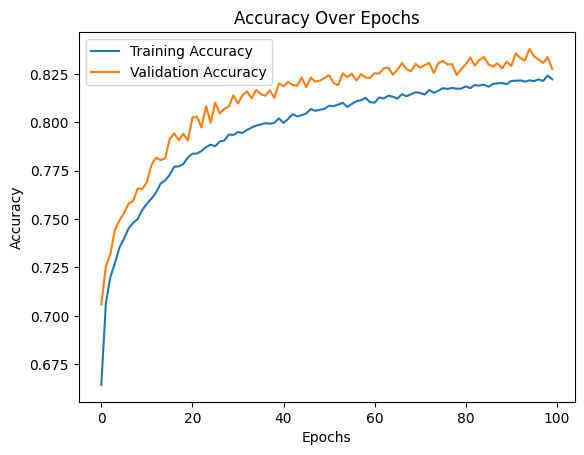

In [24]:
# 7. رسم نمودارهای دقت و خطا
# دقت
plt.plot(history6.history['accuracy'], label='Training Accuracy')
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()


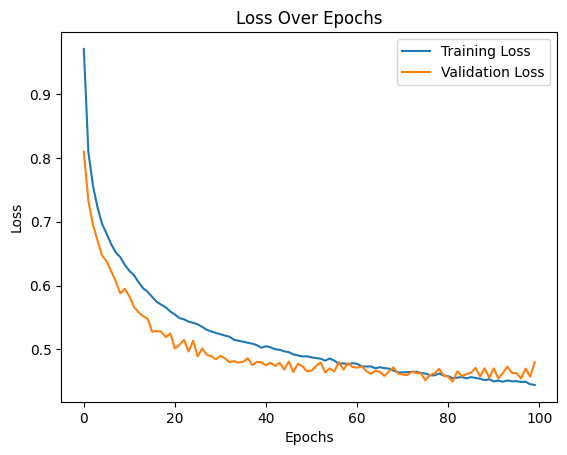

In [25]:

# خطا
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()